ID= 900212713

This assignment consists of 2 parts which analyse two different datasets. Part 1 analyses the confidence intervals of the results of different football matches. Part 2 analyzes the number of Covid-19 cases, deaths, and income level in different countries.

# Part 1: Football Matches

## Abstract

In this part, the dataset "results.csv" is used. The data shows the results of different matches between the men's national teams, starting from the year 1872 till 2019. The data consists of 43,170 match results. This big number of matches helps in reaching valid statistical conclusions about the results of different countries.

First, the confidence intervals of winning, losing, draw will be analysed when teams are playing in their home country. Also, 5 different Arab (Egypt, Saudi Arabia, Kuwait, Tunisia, and Morocco) countries' confidence intervals of winning in their home countries will be analyzed and compared. 

It was concluded (using the confidence intervals) that when playing in the home country, the team had the highest probability of winning, then losing, then draw. Also, out of the 5 countries mentioned above, Egypt was the one with the highest confidence interval of winning.


## General interpretation of home/away matches

In [88]:
import pandas as pd

In [89]:
df= pd.read_csv('results.csv')
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


 **First, we want to see how many countries are analyzed in the dataset. Then, it is important to find out the number of games each country contributed in. That is because a country must have participated in at least 200 matches, in order to include it in the statistical analysis.**

In [90]:
df['home_team'].value_counts()+ df['away_team'].value_counts() #This table would be uselful when choosing which countries will be analyzed.

In [91]:
x=df['home_score']-df['away_score']

In [92]:
x

In [93]:
conditions= [(x<0),(x>0),(x==0)] # If the result is negative: The home team has lost. If it is positive: The home team has won. If the result is 0: The match ended in a draw.
values=['lose','win','draw']

In [94]:
import numpy as np

In [95]:
df['result_home']=np.select(conditions,values)

In [96]:
df # This is the data with the new column (results_home)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result_home
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,win
43184,2/2/2022,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True,lose
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw
43186,2/5/2022,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False,draw


In [97]:
df['result_home'][0:3]

In [98]:
df['result_home'].value_counts() # This shows the number of mtaches won, lost, and draw by the home team.

In [99]:
df['result_home'].value_counts(normalize=True) # Thi converts the above information into percentages.

In [100]:
r=df['result_home'].value_counts()

In [101]:
r=np.array(r)

In [102]:
r

In [103]:
R=r.sum()

In [104]:
R # The number of matches played are 43188

43188

In [105]:
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result_home
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win


**The home team wins around 48.7% of matches. This is almost double the probability for the home team to lose or be in a draw. This might suggest that a team playing in their home country would affect the results of the match, and lead to a bigger chance for the away team to win. However, this conclusion cannot be finalized yet. That is because these probabilities include neutral matches (which didn't take place in the country of the home team OR away team). Therefore, the same process must be repeated for the matches which are not neutral, to see the impact of a match being played in the country of one of the teams.**

In [106]:
df_noneutral= df[df['neutral']==False]

In [107]:
df_noneutral.shape #a new dataset with only non-neutral matches. According to the output, there are 32481 non-neutral matches.

(32481, 10)

In [108]:
df_noneutral

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result_home
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
43181,2/1/2022,Nepal,Mauritius,1,0,Friendly,Kathmandu,Nepal,False,win
43182,2/1/2022,Nicaragua,Belize,1,1,Friendly,Managua,Nicaragua,False,draw
43183,2/1/2022,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False,win
43185,2/3/2022,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False,draw


In [109]:
y=df_noneutral['result_home'].value_counts()

In [110]:
y

In [111]:
df_noneutral['result_home'].value_counts(normalize=True)

**After removing all the neutral matches from the data, we can now correctly analyze the effect of teams playing in their home countries on the match results. Without the neutral matches, the probability of a team winning if they are playing at their home stadium has increased from 49% to 51%. This infers that this variable (matches being non-neutral) affects the match results. According to the above output, there is a much higher probability (almost double) for a home team to win a match, rather than lose it or draw. This means that a team playing in their home stadium would increase their chance of wining.**

In [112]:
n=np.array(y)
n

In [113]:
N=n.sum()# N would be used for the calculation of the confidence interval
N

32481

**Now, we want to find the confidence interval (95%) for the win, loss, and draw of a match by the home team.**

In [114]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [115]:
CIwin=proportion_confint(count=n[0],nobs=N,alpha=(1-.95))
CIwin

(0.4995656452847087, 0.5104402042888881)

In [116]:
CIlose=proportion_confint(count=n[1],nobs=N,alpha=(1-.95))
CIlose

(0.25890067381105686, 0.2684845667911413)

In [117]:
CIdraw=proportion_confint(count=n[2],nobs=N,alpha=(1-.95))
CIdraw

(0.22671878725859246, 0.23589012256561248)

In [118]:
CIhomewin = {}
CIhomewin['result_home'] = ['win','lose','draw']
CIhomewin['lb'] = [CIwin[0],CIlose[0],CIdraw[0]]
CIhomewin['ub'] = [CIwin[1],CIlose[1],CIdraw[1]]
CIhomewin
df_ci= pd.DataFrame(CIhomewin)
df_ci

,result_home,lb,ub
0,win,0.499566,0.510440
1,lose,0.258901,0.268485
2,draw,0.226719,0.235890


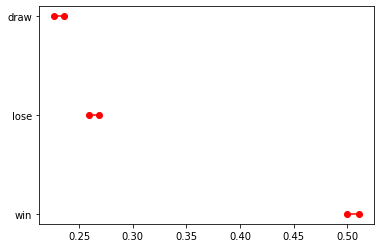

In [119]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['result_home']))

**From the above graph, we can see that the probability of the home team winning (with 95% confidence) is the highest. whereas the probability of a draw is the lowest, and the probability of losing is slightly higher than that of the draw.  There are no overlaps between any of the outcomes; this means that the difference between win/loss/draw is statistically significant. Also, the intervals are extremely narrow, meaning that there is high precision in the data and that is a good representation of the population.**

**Teams who play in their home stadiums believe that they have an advantage over the away team, as there are fans cheering for them. This explains why nowadays matches are played twice (once in each country) and the scores are added up in leagues, in order to ensure fair play.**

## Arab home/away results

The importance of an Arab team playing in their home stadium will be analyzed. Countries included: Egypt, Saudi Arabia, Kuwait Tunisia, and Morocco.

### 1) EGYPT

In [120]:
dfNoneutralEGY=df_noneutral[df_noneutral['country']=='Egypt']

In [121]:
dfNoneutralEGY

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result_home
1463,2/19/1932,Egypt,Hungary,0,0,Friendly,Cairo,Egypt,False,draw
1661,3/16/1934,Egypt,Israel,7,1,FIFA World Cup qualification,Cairo,Egypt,False,win
1895,6/19/1936,Egypt,Greece,3,1,Friendly,Cairo,Egypt,False,win
2927,12/24/1948,Egypt,Norway,1,1,Friendly,Cairo,Egypt,False,draw
3080,2/17/1950,Egypt,Greece,2,0,Friendly,Cairo,Egypt,False,win
...,...,...,...,...,...,...,...,...,...,...
42165,3/29/2021,Egypt,Comoros,4,0,African Cup of Nations qualification,Cairo,Egypt,False,win
42590,9/1/2021,Egypt,Angola,1,0,FIFA World Cup qualification,Cairo,Egypt,False,win
42758,9/30/2021,Egypt,Liberia,2,0,Friendly,Alexandria,Egypt,False,win
42812,10/8/2021,Egypt,Libya,1,0,FIFA World Cup qualification,Alexandria,Egypt,False,win


In [122]:
dfNoneutralEGY['result_home'].value_counts(normalize=True) #This shows the nupercentage of mtaches won, lost, and draw by the home team (Egypt).

**From the above output, we can see that there is a 66.3% chance of the Egyptian football team to win if they play in their country, which is around 4 times the probability of Egypt losing or having a draw. The probability of draw and loss are very close (17%). when comparing the probability of Egypt winning (in their home country) and the world average probability, we can see that it is much higher for Egypt. There is a difference of 17.6 %. This means that the Egyptian fans cheering have a great impact on Egyptian match results.**

**However, in order to make this conclusion, we have to make sure that the probability of Egypt winning is not also around 66% in its away matches. This conclusion would only be valid if the probability of Egypt winning in its opposer's country is less than 66% (The probability of Egypt winning in its home country). Therefore, we must now find out this probability.**

In [123]:
dfNoneutralEGYaway=df_noneutral[df_noneutral['away_team']=='Egypt'] # creating a data with all non-neutral matches, where Egypt is the away team
dfNoneutralEGYaway['result_home'].value_counts(normalize=True) # finding the probability of the home team winning (NOT Egypt)

**In order to analyse the above output in terms of the away team (Egypt), we should switch the percentages. Win would mean Egypt losing, and lose would mean Egypt winning.**

**Therefore:    
Draw:0.367924,    
Lose:0.349057    
Win:0.283019**

**This means that the probability of Egypt winning when it is the away team is 28.3%, which is less than 66.3%. Now we can safely conclude that the Egyptian fans cheering do have a great effect on Egyptian match results.**

In [124]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [125]:
y=dfNoneutralEGY['result_home'].value_counts() #Now we want to find the confidence interval of Egypt winning in its home country
y=np.array(y)
y

In [126]:
N=y.sum()
N

258

In [127]:
CIegy=proportion_confint(count=y[0],nobs=N,alpha=(1-.95))
CIegy

(0.6051039288730269, 0.7204774664758102)

**The same will be repeated for the other 4 Arab countries, in order to compare their confidence intervals of winning at their home country.**

### 2) Saudi Arabia

In [128]:
dfNoneutralSA=df_noneutral[df_noneutral['country']=='Saudi Arabia']
dfNoneutralSA['result_home'].value_counts(normalize=True) #This shows the nupercentage of mtaches won, lost, and draw by the home team.

**The result is close to that of Egypt.**

In [129]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint

In [130]:
y=dfNoneutralSA['result_home'].value_counts() #Now we want to find the confidence interval of Saudi Aarbia winning in its home country
y=np.array(y)
y

In [131]:
N=y.sum()
N

269

In [132]:
CIsa=proportion_confint(count=y[0],nobs=N,alpha=(1-.95))
CIsa

(0.5437421740284505, 0.6607187925143005)

### 3) Kuwait

In [133]:
dfNoneutralKUW=df_noneutral[df_noneutral['country']=='Kuwait']
dfNoneutralKUW['result_home'].value_counts(normalize=True)

In [134]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
y=dfNoneutralKUW['result_home'].value_counts()
y=np.array(y)
y

In [135]:
N=y.sum()
N

230

In [136]:
CIkuw=proportion_confint(count=y[0],nobs=N,alpha=(1-.95))
CIkuw

(0.40506693786952574, 0.534063496913083)

### 4) Tunisia

In [137]:
dfNoneutralTUN=df_noneutral[df_noneutral['country']=='Tunisia']
dfNoneutralTUN['result_home'].value_counts(normalize=True)

In [138]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
y=dfNoneutralTUN['result_home'].value_counts()
y=np.array(y)
y

In [139]:
N=y.sum()
N

272

In [140]:
CItun=proportion_confint(count=y[0],nobs=N,alpha=(1-.95))
CItun

(0.5222448180850877, 0.6395198877972653)

### 5) Oman

In [141]:
dfNoneutralOMAN=df_noneutral[df_noneutral['country']=='Oman']
dfNoneutralOMAN['result_home'].value_counts(normalize=True)

In [142]:
import statsmodels.api as sm
from statsmodels.stats.proportion import proportion_confint
y=dfNoneutralOMAN['result_home'].value_counts()
y=np.array(y)
y

In [143]:
N=y.sum()
CIoman=proportion_confint(count=y[0],nobs=N,alpha=(1-.95))
CIoman

(0.4307048087825161, 0.5692951912174838)

### 6) Comparing the Arab countries

In [144]:
CIhomewinarab = {}
CIhomewinarab['country'] = ['Egypt','Saudi Arabia','Kuwait','Tunisia','Oman']
CIhomewinarab['lb'] = [CIegy[0],CIsa[0],CIkuw[0],CItun[0],CIoman[0]]
CIhomewinarab['ub'] = [CIegy[1],CIsa[1],CIkuw[1],CItun[1],CIoman[1]]
CIhomewinarab
df_ci= pd.DataFrame(CIhomewinarab)
df_ci

,country,lb,ub
0,Egypt,0.605104,0.720477
1,Saudi Arabia,0.543742,0.660719
2,Kuwait,0.405067,0.534063
3,Tunisia,0.522245,0.639520
4,Oman,0.430705,0.569295


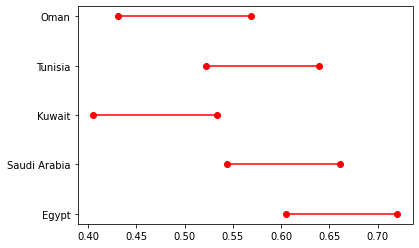

In [145]:
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['country']))

**The above graph gives a visualization of the 95% confidence intervals of the 5 Arab countries (Egypt, Saudi Arabia, Kuwait, Tunisia, and Oman). It can help us compare the probabilities of these teams winning matches in their home country. It can be seen that the intervals have close wideness, which means that the countries have a close amount of variation in the data.**

**There are many overlaps in the graph. This means that the confidence intervals that overlap do not have a statistically significant difference. For instance, Saudi Arabia and Tunis almost fully overlap, with Saudi Arabia having slightly larger upper and lower bounds. we can infer that the chance of these 2 countries winning as home teams would be extremely close.**

**The same can also be said about Kuwait and Oman. They both have the lowest intervals, and a big part of the interval overlaps (less than the overlap of Saudi Arabia and Tunisia). Which also means that there is a low statistical significance between the chances of both countries winning. Lastly, Egypt shows an overlap with Tunisia and Saudi Arabia.**

**The only 2 countries which do not slightly overlap are Egypt and Kuwait. This suggests that there is a significant statistical difference between both intervals and that Egypt has a higher probability of winning a match as a home team.**

## Conclusion:

**Egypt seems to have the highest upper and lower bounds. This means that from these 5 Arab countries, Egypt has the highest probability of winning matches where it's the home team. Following Egypt is Saudi Arabia, then Tunisia, then Oman, then Kuwait because both the upper and lower bounds decrease in that order of countries. We can conclude that Egypt has the highest probability of winning (from these Arab countries), whereas Kuwait has the least probability.**

**Generally, in order for a country to have advantage over the opposing team in football matches, it should play as the home team. That is because the home team fans will certainly surpass the number of away team fans; and the players get positive influence from the presence of their fans. Also, playing at home eliminates the fatigue of players traveling to another country and it leaves the players playing in a familiar condition, which would also improve the team's performance and score. Explaining why countries have a higher probability of winning when playing in their home country.**

# Part 2: Covid-19 cases

## **Abstract** 

In this part, the dataset "Covid_data.csv" is used. The data shows the daily number of Covid cases and deaths in 187 countries for the years 2020 and 2021. It also shows the income level of each country along with its region and continent. First, how the number of cases and deaths changed in the world as time passed.  Then, the death to cases ratio (fatality rate) will be analyzed in the 187 countries and in China, as it is the source of the pandemic. Also, it was attempted to analyze the effect of the region, income, and continent on the daily Covid cases and deaths in 2020 and 2021.

It was concluded that there were 4 waves (increases) of Covid-19 cases followed by 3 waves of increases in the number of deaths, and the number of cases was almost always more than the number of deaths. The fatality rate was around 2.5 to 3 percent worldwide. The average daily cases are higher in high income countries, Europe, and North America. There are more Covid-19 cases in 2021 than in 2020.


In [146]:
import pandas as pd
df= pd.read_csv('covid_data.csv',encoding='latin-1')

In [147]:
df

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
0,2020-02-24,AFG,Afghanistan,Low income,South Asia,Asia,5,0,38041754,Mon,Feb
1,2020-02-25,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Tue,Feb
2,2020-02-26,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Wed,Feb
3,2020-02-27,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Thu,Feb
4,2020-02-28,AFG,Afghanistan,Low income,South Asia,Asia,0,0,38041754,Fri,Feb
...,...,...,...,...,...,...,...,...,...,...,...
122838,2021-12-27,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,1098,17,14645468,Mon,Dec
122839,2021-12-28,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,2099,32,14645468,Tue,Dec
122840,2021-12-29,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,0,0,14645468,Wed,Dec
122841,2021-12-30,ZWE,Zimbabwe,Lower middle income,Sub-Saharan Africa,Africa,4180,57,14645468,Thu,Dec


We want to first create a function that can find the upper and lower bounds of confidence intervals, in order to facilitate the process.

In [148]:
from scipy import stats
from scipy.stats import norm,t

In [149]:
def get_ci_lb(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean - margin_of_error

In [150]:
def get_ci_ub(x, alpha=0.05):
    sample_s=np.std(x)
    sample_mean=np.mean(x)
    sample_size=len(x)
    margin_of_error = t.ppf(1 - alpha/2,sample_size-1)*sample_s/np.sqrt(sample_size-1)
    return sample_mean + margin_of_error

## 1. Statistical analysis of changes in the total number of cases and deaths as time passes in 187 countries.

In [151]:
import numpy as np
import pandas as pd

In [152]:
statsDATE=df.groupby("date").agg({"dcases": [np.sum, np.mean, np.std, np.size,]}) # Creating the data that will help us plot a graph that illustrates the changes in the number of cases
statsDATE # This is the data which has the total daily number of cases

dcases 
 
 
 
 sum 
 mean 
 std 
 size 
 
 
 date 
 
 
 
 
 
 
 
 
 2020-01-22 
 556 
 111.200000 
 244.181695 
 5 
 
 
 2020-01-23 
 100 
 12.500000 
 33.346664 
 8 
 
 
 2020-01-24 
 285 
 31.666667 
 92.002717 
 9 
 
 
 2020-01-25 
 493 
 44.818182 
 146.328274 
 11 
 
 
 2020-01-26 
 682 
 56.833333 
 192.787133 
 12 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 2021-12-27 
 1281192 
 6851.294118 
 41261.650149 
 187 
 
 
 2021-12-28 
 1330998 
 7117.636364 
 32216.866272 
 187 
 
 
 2021-12-29 
 1724167 
 9220.144385 
 43179.093930 
 187 
 
 
 2021-12-30 
 1940432 
 10376.641711 
 49932.947023 
 187 
 
 
 2021-12-31 
 1714926 
 9170.727273 
 44126.962602 
 187 
 
 
 
 710 rows × 4 columns

In [153]:
statsDATEdf=pd.DataFrame(statsDATE['dcases'])
statsDATEdf.columns=['total', 'mean','std','size']
statsDATEdf['date']=statsDATEdf.index

In [154]:
statsDATEdf['date']=statsDATEdf.index

In [155]:
statsDATEdf

,total,mean,std,size,date
date,,,,,
2020-01-22,556,111.200000,244.181695,5,2020-01-22
2020-01-23,100,12.500000,33.346664,8,2020-01-23
2020-01-24,285,31.666667,92.002717,9,2020-01-24
2020-01-25,493,44.818182,146.328274,11,2020-01-25
2020-01-26,682,56.833333,192.787133,12,2020-01-26
...,...,...,...,...,...
2021-12-27,1281192,6851.294118,41261.650149,187,2021-12-27
2021-12-28,1330998,7117.636364,32216.866272,187,2021-12-28
2021-12-29,1724167,9220.144385,43179.093930,187,2021-12-29


In [156]:
statsDATE2=df.groupby("date").agg({"ddeaths": [np.sum, np.mean, np.std, np.size,]}) # The data that has the average daily number of deaths

In [157]:
statsDATE2df=pd.DataFrame(statsDATE2['ddeaths'])
statsDATE2df.columns=['total','mean','std','size']
statsDATE2df['date']=statsDATE2df.index

In [158]:
statsDATE2df

,total,mean,std,size,date
date,,,,,
2020-01-22,17,3.400000,7.602631,5,2020-01-22
2020-01-23,1,0.125000,0.353553,8,2020-01-23
2020-01-24,8,0.888889,2.666667,9,2020-01-24
2020-01-25,16,1.454545,4.824182,11,2020-01-25
2020-01-26,14,1.166667,4.041452,12,2020-01-26
...,...,...,...,...,...
2021-12-27,6726,35.967914,161.704293,187,2021-12-27
2021-12-28,7478,39.989305,195.229614,187,2021-12-28
2021-12-29,8037,42.978610,197.903663,187,2021-12-29


**We now have the two datasets that would help us create a scatter plot to understand the pattern of the changes in the number of Covid cases and deaths**

In [159]:
import matplotlib.pyplot as plt

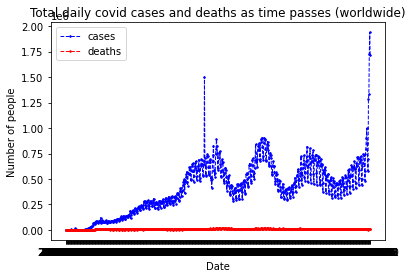

In [160]:
plt.plot( 'date', 'total', data=statsDATEdf, marker='.', color='blue', markersize=3,     linewidth=1, linestyle='--')
plt.plot( 'date', 'total', data=statsDATE2df, marker='.', color='red', markersize=3,     linewidth=1, linestyle='--')

plt.xlabel("Date")
plt.ylabel("Number of people")
plt.title("Total daily covid cases and deaths as time passes (worldwide)")
plt.legend(['cases','deaths'])
plt.show()

**The above graph is a scatter plot which represents the daily number of Covid-19 cases and deaths. The blue plot represents the cases, whereas the red one represents the number of deaths.** 

**When observing the average number of daily cases (blue), it can be seen that as the 2 years (from 2020 till the end of 2021) passed, there have been variations in the daily number of reported cases. 4 different maximum points can be seen; these 4 curves shown suggest that there were 4 waves of Covid-19. A wave represents a time when the spread of Covid was rapid, which leads to the increase in the number of daily cases. The 4th wave seems to start at the beginning of the year 2022, which explains why only the half of the wave is shown in the graph, as the data collection ended by the end of 2021. It can be seen that the time between each wave is consistent (when a certain amount of time passes after a wave, a new one starts).**

**It is important to note that these numbers are surely an inaccurate representation of the number of cases and deaths. That is because not all cases are reported and recorded; which implies that the data is underestimating the total number of daily cases.**

**When looking at the number of daily deaths and comparing it to the number of cases, the number of daily deaths is much smaller, which may suggest that a relatively small proportion of people included in the number of cases has died from the virus.** 

**Lastly, it seems like the daily number of deaths caused by Covid-19 is consistent because the red plot looks like a straight line with no (or minimal) variations and curves. However, this conclusion cannot be made without having a closer look on the plot of the number of deaths.** 

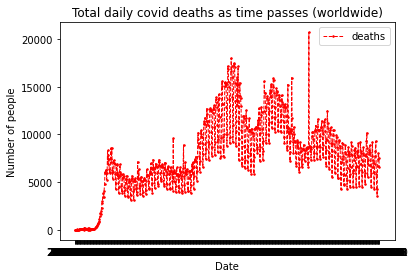

In [161]:
#creating a plot with noly the daily death number to see the graph up close and understand the trend.

plt.plot( 'date', 'total', data=statsDATE2df, marker='.', color='red', markersize=3,     linewidth=1, linestyle='--')

plt.xlabel("Date")
plt.ylabel("Number of people")
plt.title("Total daily covid deaths as time passes (worldwide)")
plt.legend(['deaths'])
plt.show()

**After having a closer look, we can see that there were actually variations in the number of deaths. The plot looked straight in the previous graph because it was compared to another one with much higher measurements (the number of daily cases). However, the variation present in the plot of the daily number of deaths is not extreme, like the plot of the number of cases.**

**It can be seen that there were 3 maximum points (representing a high number of deaths). When comparing the three waves in the red curve with the blue one, it is noticed that the increases in deaths (red plot waves) follow the increases in the number of cases (blue plot waves) with respect of time. Meaning that an effect of the increase in the number of Covid cases is an increase in the number of deaths.**

## 2. The worldwide (187 countries) fatality rate vs Chinese fatality rate

### The worldwide fatality rate

the fatality rate can be calculated by dividing the number of deaths over the number of cases. After dividing the 2 numbers, the rate would be in form of decimals. Where, for example, 0.25 would mean that 25% of cases on that day die.

In [162]:
statsCDR= statsDATE2df['total']/ statsDATEdf['total'] #craeting a data which represents the ratio between deaths and cases
statsCDRdf=pd.DataFrame(statsCDR)
statsCDRdf.columns=['total']
statsCDRdf['date']=statsCDRdf.index
statsCDRdf  

,total,date
date,,
2020-01-22,0.030576,2020-01-22
2020-01-23,0.010000,2020-01-23
2020-01-24,0.028070,2020-01-24
2020-01-25,0.032454,2020-01-25
2020-01-26,0.020528,2020-01-26
...,...,...
2021-12-27,0.005250,2021-12-27
2021-12-28,0.005618,2021-12-28
2021-12-29,0.004661,2021-12-29


The visualize and statistics options in the above output will also be used to find specific values in the data, as they would help in the statistical analysis. 

In this visualize option, we can zoom in on the graph created below and see the dates of the exact points.

In [163]:
statsCDRdf.describe()

,total
count,710.000000
mean,0.026519
std,0.023149
min,0.003396
25%,0.015884
50%,0.019335
75%,0.026644
max,0.282686


In [164]:
import matplotlib.pyplot as plt

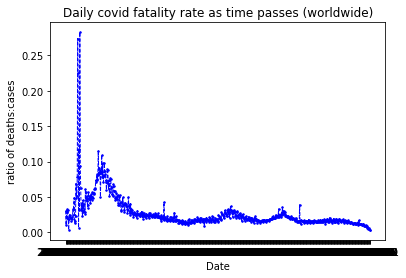

In [165]:
plt.plot('date', 'total', data= statsCDRdf, marker='.', color='blue', markersize=3, linewidth=1, linestyle='--')

plt.xlabel("Date")
plt.ylabel("ratio of deaths:cases")
plt.title("Daily covid fatality rate as time passes (worldwide)")
plt.show()

**It is seen that in the beginning of the pandemic, the fatality rate was the highest. There are two major spikes that represent increases in the rate. For 20 days, the rate has been increasing till it reached 28% on the 24th of February (this represents the 1st obvious spike in the plot). However, this rate increase did not last for long, and the next day the rate decreased back to around 3%.**

**The rate increased again until the 2nd spike was reached with a maximum of 11.5% in April of 2020. The rate then decreased and was relatively steady between 1% to 5% with some fluctuations till the end of 2021. 75 percent of the days from 2020 till the end of 2021 had a rate less than or equal to 2.7%**

### Chinese Covid fatality rate 

In [166]:
dfCHI=df[df['country']=='China'] # data taken from china only
dfCHI

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month
21405,2020-01-22,CHN,China,Upper middle income,East Asia & Pacific,Asia,548,17,1397715000,Wed,Jan
21406,2020-01-23,CHN,China,Upper middle income,East Asia & Pacific,Asia,95,1,1397715000,Thu,Jan
21407,2020-01-24,CHN,China,Upper middle income,East Asia & Pacific,Asia,277,8,1397715000,Fri,Jan
21408,2020-01-25,CHN,China,Upper middle income,East Asia & Pacific,Asia,486,16,1397715000,Sat,Jan
21409,2020-01-26,CHN,China,Upper middle income,East Asia & Pacific,Asia,669,14,1397715000,Sun,Jan
...,...,...,...,...,...,...,...,...,...,...,...
22110,2021-12-27,CHN,China,Upper middle income,East Asia & Pacific,Asia,371,0,1397715000,Mon,Dec
22111,2021-12-28,CHN,China,Upper middle income,East Asia & Pacific,Asia,203,0,1397715000,Tue,Dec
22112,2021-12-29,CHN,China,Upper middle income,East Asia & Pacific,Asia,221,0,1397715000,Wed,Dec
22113,2021-12-30,CHN,China,Upper middle income,East Asia & Pacific,Asia,208,0,1397715000,Thu,Dec


In [167]:
statsDATEchi=dfCHI.groupby("date").agg({"dcases": [np.sum,]})
statsDATEchidf=pd.DataFrame(statsDATEchi['dcases'])
statsDATEchidf.columns=['total']
statsDATEchidf['date']=statsDATEchidf.index
statsDATEchidf

,total,date
date,,
2020-01-22,548,2020-01-22
2020-01-23,95,2020-01-23
2020-01-24,277,2020-01-24
2020-01-25,486,2020-01-25
2020-01-26,669,2020-01-26
...,...,...
2021-12-27,371,2021-12-27
2021-12-28,203,2021-12-28
2021-12-29,221,2021-12-29


In [168]:
statsDATE2chi=dfCHI.groupby("date").agg({"ddeaths": [np.sum,]})
statsDATE2chidf=pd.DataFrame(statsDATE2chi['ddeaths'])
statsDATE2chidf.columns=['total']
statsDATE2chidf['date']=statsDATE2chidf.index
statsDATE2chidf # same as above but with the number of daily deaths

,total,date
date,,
2020-01-22,17,2020-01-22
2020-01-23,1,2020-01-23
2020-01-24,8,2020-01-24
2020-01-25,16,2020-01-25
2020-01-26,14,2020-01-26
...,...,...
2021-12-27,0,2021-12-27
2021-12-28,0,2021-12-28
2021-12-29,0,2021-12-29


In [169]:
statsCDRchi= statsDATE2chidf['total']/ statsDATEchidf['total']
statsCDRchidf=pd.DataFrame(statsCDRchi)
statsCDRchidf.columns=['total']
statsCDRchidf['date']=statsCDRchidf.index
statsCDRchidf #The ratio of the chinese fatality rate 

,total,date
date,,
2020-01-22,0.031022,2020-01-22
2020-01-23,0.010526,2020-01-23
2020-01-24,0.028881,2020-01-24
2020-01-25,0.032922,2020-01-25
2020-01-26,0.020927,2020-01-26
...,...,...
2021-12-27,0.000000,2021-12-27
2021-12-28,0.000000,2021-12-28
2021-12-29,0.000000,2021-12-29


In [170]:
statsCDRchidf.describe()

,total
count,704.000000
mean,0.028869
std,0.159220
min,0.000000
25%,0.000000
50%,0.000000
75%,0.014311
max,3.613445


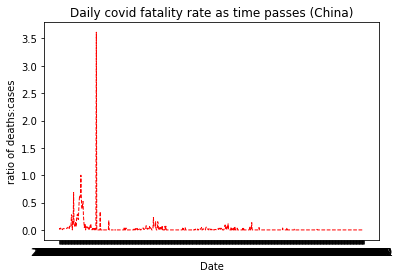

In [171]:
plt.plot('date', 'total', data= statsCDRchidf, color='red', markersize=3, linewidth=1, linestyle='--')

plt.xlabel("Date")
plt.ylabel("ratio of deaths:cases")
plt.title("Daily covid fatality rate as time passes (China)")
plt.show()

**From the above graph, we can see that there were several spikes. In March of 2020, the fatality rate reached 100%. There is also an outlier on the 17th of April 2020, where the rate reached 360%. Which means that the number of deaths on that day was three and a half times the number of cases. However, this rate was only reached once and it is an outlier, so it will not be used in the statistical analysis. After ignoring this outlier, the new maximum would be at a rate of 1 (100%).**

**After the month of May in 2020, there were several variations in the rate ranging from 0 to 0.23 (23%). 75 percent of the days from 2020 till the end of 2021 had a rate less than or equal to 1.4%**


### China vs worldwide fatality rate 

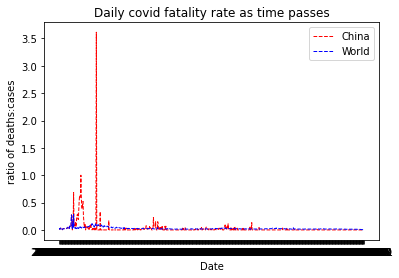

In [172]:
plt.plot('date', 'total', data= statsCDRchidf, color='red', markersize=3, linewidth=1, linestyle='--')
plt.plot('date', 'total', data= statsCDRdf, color='blue', markersize=3, linewidth=1, linestyle='--')

plt.xlabel("Date")
plt.ylabel("ratio of deaths:cases")
plt.title("Daily covid fatality rate as time passes")
plt.legend(['China','World'])
plt.show()

**We put the worldwide and Chinese plot for the fatality rate in one graph, in order to compare them. Just by looking at the graph, it can be seen that the Chinese rate surpasses the world rate several times. This might lead us to conclude that the general rate in China is higher than the world rate. However, both averages are very close (World:0.027, China: 0.029). Also, Q3 in China is less (World:0.027, China: 0.014). This might actually mean that the world fatality rate is close to that of China.**

## 3. Confidence interval of average daily Covid cases comparisons between two different incomes (low & high) by year

We first want to create a column that divides the data into the two years 2020 and 2021

In [173]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')
df['date'][0]

Timestamp('2020-02-24 00:00:00')

In [174]:
df['year'] = pd. DatetimeIndex(df['date']). year
df['year'][0]

2020

In [175]:
#creating the data in terms of income
statsINC=df.groupby(['income','year']).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsINCdf=statsINC.reset_index()
statsINCdf

income 
 year 
 dcases 
 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 
 
 0 
 High income 
 2020 
 2321.685027 
 12494.070695 
 17865 
 2138.462037 
 2504.908017 
 
 
 1 
 High income 
 2021 
 4520.954339 
 18317.784729 
 20937 
 4272.818827 
 4769.089852 
 
 
 2 
 Low income 
 2020 
 77.125254 
 283.402922 
 8351 
 71.046059 
 83.204450 
 
 
 3 
 Low income 
 2021 
 168.681058 
 657.105911 
 10585 
 156.161537 
 181.200579 
 
 
 4 
 Lower middle income 
 2020 
 1214.800373 
 6871.170940 
 12879 
 1096.120084 
 1333.480661 
 
 
 5 
 Lower middle income 
 2021 
 2550.449589 
 17762.604302 
 16653 
 2280.650760 
 2820.248417 
 
 
 6 
 Upper middle income 
 2020 
 1643.653786 
 8259.918227 
 15863 
 1515.106084 
 1772.201487 
 
 
 7 
 Upper middle income 
 2021 
 3368.106393 
 8585.182602 
 19710 
 3248.244540 
 3487.968246

In [176]:
# Creating the data for high income
statsHIGH20df=statsINCdf[(statsINCdf['income']=='High income') & (statsINCdf['year']==2020)]
statsHIGH21df=statsINCdf[(statsINCdf['income']=='High income') & (statsINCdf['year']==2021)]

In [177]:
# Creating the data for low income
statsLOW20df=statsINCdf[(statsINCdf['income']=='Low income') & (statsINCdf['year']==2020)]
statsLOW21df=statsINCdf[(statsINCdf['income']=='Low income') & (statsINCdf['year']==2021)]

In [178]:
statsLOW21df

income 
 year 
 dcases 
 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 
 
 3 
 Low income 
 2021 
 168.681058 
 657.105911 
 10585 
 156.161537 
 181.200579

In [179]:
statsLOW21df.iloc[0,5]

156.16153742238862

In [180]:
df[(df['income']=='Low income') & (df['date']=='2020-04-27 00:00:00')] # To know the number of low income countries

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year
63,2020-04-27,AFG,Afghanistan,Low income,South Asia,Asia,68,1,38041754,Mon,Apr,2020
7444,2020-04-27,BDI,Burundi,Low income,Sub-Saharan Africa,Africa,0,0,11530580,Mon,Apr,2020
8797,2020-04-27,BEN,Benin,Low income,Sub-Saharan Africa,Africa,0,0,11801151,Mon,Apr,2020
9459,2020-04-27,BFA,Burkina Faso,Low income,Sub-Saharan Africa,Africa,3,0,20321378,Mon,Apr,2020
18728,2020-04-27,CAF,Central African Republic,Low income,Sub-Saharan Africa,Africa,0,0,4745185,Mon,Apr,2020
23489,2020-04-27,COD,Congo - Kinshasa,Low income,Sub-Saharan Africa,Africa,17,0,86790567,Mon,Apr,2020
36155,2020-04-27,ETH,Ethiopia,Low income,Sub-Saharan Africa,Africa,1,0,112078730,Mon,Apr,2020
41570,2020-04-27,GIN,Guinea,Low income,Sub-Saharan Africa,Africa,167,0,12771246,Mon,Apr,2020
42225,2020-04-27,GMB,Gambia,Low income,Sub-Saharan Africa,Africa,0,0,2347706,Mon,Apr,2020
42872,2020-04-27,GNB,Guinea-Bissau,Low income,Sub-Saharan Africa,Africa,20,0,1920922,Mon,Apr,2020


In [181]:
df[(df['income']=='High income') & (df['date']=='2020-04-27 00:00:00')] # To know the number of high income countries

,date,iso3c,country,income,region,continent,dcases,ddeaths,population,weekdays,month,year
2048,2020-04-27,AND,Andorra,High income,Europe & Central Asia,Europe,5,0,77142,Mon,Apr,2020
2751,2020-04-27,ARE,United Arab Emirates,High income,Middle East & North Africa,Asia,490,6,9770529,Mon,Apr,2020
4750,2020-04-27,ATG,Antigua & Barbuda,High income,Latin America & Caribbean,North America(continent),0,0,97118,Mon,Apr,2020
5456,2020-04-27,AUS,Australia,High income,East Asia & Pacific,Oceania,7,0,25364307,Mon,Apr,2020
6132,2020-04-27,AUT,Austria,High income,Europe & Central Asia,Europe,49,7,8877067,Mon,Apr,2020
8141,2020-04-27,BEL,Belgium,High income,Europe & Central Asia,Europe,553,113,11484055,Mon,Apr,2020
11464,2020-04-27,BHR,Bahrain,High income,Middle East & North Africa,Asia,76,0,1641172,Mon,Apr,2020
12120,2020-04-27,BHS,Bahamas,High income,Latin America & Caribbean,North America(continent),0,0,389482,Mon,Apr,2020
16100,2020-04-27,BRB,Barbados,High income,Latin America & Caribbean,North America(continent),1,0,287025,Mon,Apr,2020
16763,2020-04-27,BRN,Brunei,High income,East Asia & Pacific,Asia,0,0,433285,Mon,Apr,2020


In [182]:
CIcovidINC = {}
CIcovidINC['income'] = ['Low income 20','Low income 21','High income 20','High income 21']
CIcovidINC['lb'] = [statsLOW20df.iloc[0,5],statsLOW21df.iloc[0,5],statsHIGH20df.iloc[0,5],statsHIGH21df.iloc[0,5]]
CIcovidINC['ub'] = [statsLOW20df.iloc[0,6],statsLOW21df.iloc[0,6],statsHIGH20df.iloc[0,6],statsHIGH21df.iloc[0,6]]
df_ci= pd.DataFrame(CIcovidINC)
df_ci

,income,lb,ub
0,Low income 20,71.046059,83.204450
1,Low income 21,156.161537,181.200579
2,High income 20,2138.462037,2504.908017
3,High income 21,4272.818827,4769.089852


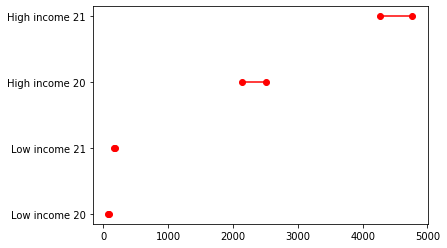

In [183]:
#plotting the confidence intervals of average daily covid cases per year and income
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['income']))

**The above graph gives a visualization of the 95% confidence intervals of daily confirmed Covid cases in high and low income countries, in the years 2020 and 2021.** 

**Firstly, it can be seen that all 4 groups are relatively narrow; which means that there is little variation in the number of daily cases within each group. However, the low income groups' intervals (both 2020 and 2021) are much narrower than the high income groups. Meaning that there is less variation in the low income groups. This might be because the low income group consists of only 28 countries, whereas the high income group consists of 57 countries. The high income interval has more countries, which means that there is more room for variation within the daily number of cases.**

**It can also be seen that in both groups (low income & high income) the confidence interval is higher in 2021 than 2020. This means that the overall worldwide daily cases were much more in 2021 than in 2020. However, the confidence interval of the low income countries in 2021 does not exceed 2020 by a very large proportion (unlike the high confidence interval).**

**There are no overlaps between any of the 4 groups' confidence intervals. This simply means that there is a significant statistical difference between the intervals.**

**The intervals increase in the following order: low income 2020, low income 2021, high income 2020, high income 2021. It was already established that the intervals in 2021 are higher than 2020, but we can also infer from the graph that the average daily cases in high income countries are more than in low income countries. This is due to the fact that high income countries are more developed; thus they have better medical resources and infrastructure in larger quantities than low income countries. This means that higher income countries have access to more Covid-19 tests, which increases the possibility of having positive cases. This does not necessarily mean that there are more daily cases in high income countries. It only means that there are more reported cases.**

## 4. Confidence interval of average daily Covid cases comparisons between two different Continents (Arfrica & Europe) by year

In [184]:
statsCONT=df.groupby(['continent','year']).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsCONT

dcases 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 continent 
 year 
 
 
 
 
 
 
 
 
 
 Africa 
 2020 
 179.989695 
 812.148803 
 15332 
 167.133318 
 192.846071 
 
 
 2021 
 361.298423 
 1454.828779 
 19345 
 340.796114 
 381.800733 
 
 
 Asia 
 2020 
 1448.863760 
 9560.899804 
 14313 
 1292.218142 
 1605.509379 
 
 
 2021 
 3835.418999 
 18090.729958 
 16790 
 3561.759742 
 4109.078257 
 
 
 Europe 
 2020 
 1783.304743 
 5020.494465 
 13408 
 1698.317882 
 1868.291605 
 
 
 2021 
 4145.443007 
 10270.295699 
 15695 
 3984.754849 
 4306.131166 
 
 
 North America(continent) 
 2020 
 3390.453029 
 19128.794001 
 6834 
 2936.850853 
 3844.055205 
 
 
 2021 
 4976.624658 
 25708.743737 
 8395 
 4426.601186 
 5526.648129 
 
 
 Oceania 
 2020 
 21.459072 
 73.945973 
 1466 
 17.670683 
 25.247461 
 
 
 2021 
 151.743598 
 1082.525697 
 3280 
 114.683230 
 188.803965 
 
 
 South America(continent) 
 2020 
 3669.935090 
 8827.038998 
 3605 
 3381.693677 
 3958.176504 
 
 
 2021 
 6067.011416 
 14054.616405 
 4380 
 5650.669546 
 6483.353286

In [185]:
statsCONTdf=statsCONT.reset_index()
statsCONTdf

continent 
 year 
 dcases 
 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 
 
 0 
 Africa 
 2020 
 179.989695 
 812.148803 
 15332 
 167.133318 
 192.846071 
 
 
 1 
 Africa 
 2021 
 361.298423 
 1454.828779 
 19345 
 340.796114 
 381.800733 
 
 
 2 
 Asia 
 2020 
 1448.863760 
 9560.899804 
 14313 
 1292.218142 
 1605.509379 
 
 
 3 
 Asia 
 2021 
 3835.418999 
 18090.729958 
 16790 
 3561.759742 
 4109.078257 
 
 
 4 
 Europe 
 2020 
 1783.304743 
 5020.494465 
 13408 
 1698.317882 
 1868.291605 
 
 
 5 
 Europe 
 2021 
 4145.443007 
 10270.295699 
 15695 
 3984.754849 
 4306.131166 
 
 
 6 
 North America(continent) 
 2020 
 3390.453029 
 19128.794001 
 6834 
 2936.850853 
 3844.055205 
 
 
 7 
 North America(continent) 
 2021 
 4976.624658 
 25708.743737 
 8395 
 4426.601186 
 5526.648129 
 
 
 8 
 Oceania 
 2020 
 21.459072 
 73.945973 
 1466 
 17.670683 
 25.247461 
 
 
 9 
 Oceania 
 2021 
 151.743598 
 1082.525697 
 3280 
 114.683230 
 188.803965 
 
 
 10 
 South America(continent) 
 2020 
 3669.935090 
 8827.038998 
 3605 
 3381.693677 
 3958.176504 
 
 
 11 
 South America(continent) 
 2021 
 6067.011416 
 14054.616405 
 4380 
 5650.669546 
 6483.353286

In [186]:
# Creating the data for Africa
statsAFR20df=statsCONTdf[(statsCONTdf['continent']=='Africa') & (statsCONTdf['year']==2020)]
statsAFR21df=statsCONTdf[(statsCONTdf['continent']=='Africa') & (statsCONTdf['year']==2021)]

In [187]:
statsAFR20df

continent 
 year 
 dcases 
 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 
 
 0 
 Africa 
 2020 
 179.989695 
 812.148803 
 15332 
 167.133318 
 192.846071

In [188]:
# Creating the data for Europe
statsEUR20df=statsCONTdf[(statsCONTdf['continent']=='Europe') & (statsCONTdf['year']==2020)]
statsEUR21df=statsCONTdf[(statsCONTdf['continent']=='Europe') & (statsCONTdf['year']==2021)]

In [189]:
statsAFR20df.iloc[0,5]

167.1333182485662

In [190]:
CIcovidAfrEur = {}
CIcovidAfrEur['continent'] = ['Africa20','Africa21','Europe21','Europe21']
CIcovidAfrEur['lb'] = [statsAFR20df.iloc[0,5],statsAFR21df.iloc[0,5],statsEUR20df.iloc[0,5],statsEUR21df.iloc[0,5]]
CIcovidAfrEur['ub'] = [statsAFR20df.iloc[0,6],statsAFR21df.iloc[0,6],statsEUR20df.iloc[0,6],statsEUR21df.iloc[0,6]]
df_ci= pd.DataFrame(CIcovidAfrEur)
df_ci

,continent,lb,ub
0,Africa20,167.133318,192.846071
1,Africa21,340.796114,381.800733
2,Europe21,1698.317882,1868.291605
3,Europe21,3984.754849,4306.131166


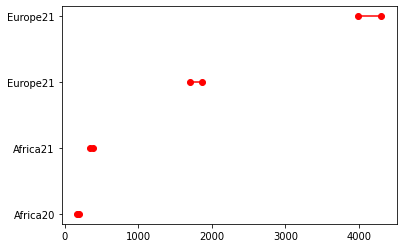

In [191]:
#plotting the confidence intervals of average daily covid cases per year and continent
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['continent']))

**The above graph gives a visualization of the 95% confidence intervals of daily confirmed Covid cases in the continents of Africa and Europe in the years 2020 and 2021.** 

**Firstly, it can be seen that all 4 groups (Africa20, Africa21, Europe20, Europe21) are relatively narrow; which means that there is little variation in the number of daily cases within each group. However, the intervals of Africa (both 2020 and 2021) are slightly narrower than those of Europe. Meaning that there is less variation in the daily Covid cases in Africa.**

**It can also be seen that in both continents (Africa & Europe) the confidence interval is higher in 2021 than 2020. This means that the overall worldwide daily cases were much more in 2021 than in 2020. However, the confidence interval of the African countries in 2021 does not exceed 2020 by a very large proportion (unlike the European confidence interval). This is very similar to the low income and high income comparison explained in the previous part**

**There are no overlaps between any of the confidence intervals. This simply means that there is a significant statistical difference between the intervals.**

**The intervals increase in the following order: Africa 2020, Africa 2021, Europe 2020, Europe 2021. We can infer from the graph and the order of the intervals that the average daily cases in European countries are more than in African countries. This might be caused by the same reason mentioned in the previous part. Africa consists of countries with lower incomes than Europe; which means that Africa could be classified as a low income continent, while Europe is a high income one. Therefore, due to the fact that high income countries are more developed, they have better medical resources and infrastructure in larger quantities than low income countries. This means that higher income countries have access to more Covid-19 tests, which increases the possibility of having positive cases. This explains why Europe has more reported Covid-19 cases.**

## 5. Confidence interval of average daily Covid cases comparisons between two different regions (North America and South Asia) by year

In [192]:
df['region'].unique()

In [193]:
#creating the data in terms of regions
statsREG=df.groupby(['region','year']).agg({"dcases": [np.mean, np.std, np.size,get_ci_lb,get_ci_ub]})
statsREGdf=statsREG.reset_index()
statsREGdf

region 
 year 
 dcases 
 
 
 
 
 
 mean 
 std 
 size 
 get_ci_lb 
 get_ci_ub 
 
 
 
 
 0 
 East Asia & Pacific 
 2020 
 309.256309 
 896.313605 
 6301 
 287.120939 
 331.391678 
 
 
 1 
 East Asia & Pacific 
 2021 
 1902.043518 
 4625.905443 
 8755 
 1805.131683 
 1998.955353 
 
 
 2 
 Europe & Central Asia 
 2020 
 1721.858350 
 8132.391315 
 15743 
 1594.813810 
 1848.902890 
 
 
 3 
 Europe & Central Asia 
 2021 
 4023.235026 
 9943.233979 
 18615 
 3880.387583 
 4166.082468 
 
 
 4 
 Latin America & Caribbean 
 2020 
 1601.753333 
 5688.858753 
 9750 
 1488.819296 
 1714.687371 
 
 
 5 
 Latin America & Caribbean 
 2021 
 2665.195766 
 9032.505081 
 12045 
 2503.872669 
 2826.518863 
 
 
 6 
 Middle East & North Africa 
 2020 
 762.715511 
 1430.243017 
 6415 
 727.709585 
 797.721436 
 
 
 7 
 Middle East & North Africa 
 2021 
 1620.897326 
 3832.749549 
 7665 
 1535.080777 
 1706.713874 
 
 
 8 
 North America(region) 
 2020 
 30164.552975 
 53111.710028 
 689 
 26191.782753 
 34137.323198 
 
 
 9 
 North America(region) 
 2021 
 49657.521918 
 73271.501688 
 730 
 44333.456360 
 54981.587475 
 
 
 10 
 South Asia 
 2020 
 4586.009052 
 14809.626669 
 2541 
 4009.910388 
 5162.107715 
 
 
 11 
 South Asia 
 2021 
 9507.577055 
 41050.751055 
 2920 
 8018.017440 
 10997.136669 
 
 
 12 
 Sub-Saharan Africa 
 2020 
 135.919003 
 789.508946 
 13519 
 122.609196 
 149.228810 
 
 
 13 
 Sub-Saharan Africa 
 2021 
 304.006762 
 1452.606156 
 17155 
 282.268178 
 325.745346

In [194]:
# Creating the data for North America
statsNAr20df=statsREGdf[(statsREGdf['region']=='North America(region)') & (statsREGdf['year']==2020)]
statsNAr21df=statsREGdf[(statsREGdf['region']=='North America(region)') & (statsREGdf['year']==2021)]

In [195]:
# Creating the data for South Asia
statsSAr20df=statsREGdf[(statsREGdf['region']=='South Asia') & (statsREGdf['year']==2020)]
statsSAr21df=statsREGdf[(statsREGdf['region']=='South Asia') & (statsREGdf['year']==2021)]

In [196]:
CIcovidNaSa = {}
CIcovidNaSa['region'] = ['North America20','North America21','South Asia20','South Asia21']
CIcovidNaSa['lb'] = [statsNAr20df.iloc[0,5],statsNAr21df.iloc[0,5],statsSAr20df.iloc[0,5],statsSAr21df.iloc[0,5]]
CIcovidNaSa['ub'] = [statsNAr20df.iloc[0,6],statsNAr21df.iloc[0,6],statsSAr20df.iloc[0,6],statsSAr21df.iloc[0,6]]
df_ci= pd.DataFrame(CIcovidNaSa)
df_ci

,region,lb,ub
0,North America20,26191.782753,34137.323198
1,North America21,44333.456360,54981.587475
2,South Asia20,4009.910388,5162.107715
3,South Asia21,8018.017440,10997.136669


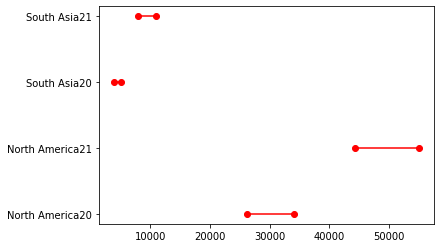

In [197]:
#plotting the confidence intervals of average daily covid cases per year and region
import matplotlib.pyplot as plt
for lb,ub,y in zip(df_ci['lb'],df_ci['ub'],range(len(df_ci))):
    plt.plot((lb,ub),(y,y),'ro-')
plt.yticks(range(len(df_ci)),list(df_ci['region']))

**The above graph gives a visualization of the 95% confidence intervals of daily confirmed Covid cases in the regions of North America and South Asia in the years 2020 and 2021.** 

**Firstly, it can be seen that the interval od the region of South Asia is narrow, which means that there is little variation in the number of daily cases within the countries of this region. On the other hand, the intervals of North America are not relatively wide, meaning that there are many variations in the average daily cases within this region's countries and that the data is less precise. However, the interval of North America in 2020 is slightly narrower than 2021; this suggests that there were more variations in 2021 than in 2020 (The same also applies to South Asia)**

**It can also be seen that in both regions, the confidence interval is higher in 2021 than 2020 (similarly as the 2 previous parts). This means that the overall worldwide daily cases were much more in 2021 than in 2020. However, the confidence interval of North America in 2021 exceeds 2020 by a much larger proportion than the proportion between South Asia in 2021 and 2020.**

**There are no overlaps between any of the confidence intervals. This means that there is a significant statistical difference between the intervals.**

**The intervals increase in the following order: South Asia 2020, South Asia 2021, North America 2020, North America 2021. We can infer from the graph and the order of the intervals that the average daily cases in the countries of North America are more than in European countries. This might be because North America has countries with higher average daily cases. For instance, North America has the country of the US, which is the country with the most Covid-19 cases in the world and is a country with a very large population. This means that the number of daily cases in the US must have affected the average number of daily cases in North America (causing it to increase). This might also explain why the intervals of North America are wide; because it has one of the countries with the most Covid cases (causing a lot of variations within this region)**

### Conclusion:

There were 4 waves (increases) of Covid-19 cases followed by 3 waves of increases in the number of deaths, and the number of cases was almost always more than the number of deaths. The fatality rate was around 2.5 to 3 percent worldwide. The average daily cases are higher in high income countries, Europe, and North America. There are more Covid-19 cases in 2021 than in 2020.